In [67]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import tweepy

from tweepy import Stream
from tweepy.streaming import StreamListener
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [68]:
# twitter App access keys for @user
 
# Consumer
CONSUMER_KEY    = "7VHsv3d67YfHKLrRjplMRBJa0"
CONSUMER_SECRET = "ZltYoVKttmVFZ2ZrsorQu5CqDpfhHlBZj07JoDMzNgrcRdApVj"
 
# Access:
ACCESS_TOKEN  = "1151690055733276673-AMtLepEP9DSYD5lGP5O9FnfUgLfcUB"
ACCESS_SECRET = "3y45eSHO6KQz00vCNTIRs7f3erJprvqo5VDIWnwZiBSvG"

In [69]:
# We import our access keys:
 
def twitter_setup():
    
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

In [70]:
extractor = twitter_setup()
 
tweets = extractor.user_timeline(screen_name="sterling7", count = 500)
print("number of tweets extracted: {}.\n".format(len(tweets)))
 
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

number of tweets extracted: 200.

5 recent tweets:

@SI8BALL @SpursOfficial 👍🏾 fair play bro. See you guys at your place

@SpursOfficial when this thing pops up on the screen.. https://t.co/dCtdaNPrzc

Feeling like we deserved so much more than just this point today. No luck to say the least, but many positives to r… https://t.co/H13URgLIxd

💙 its all about love https://t.co/Hoh0aBbhmq

RT @ManCityFra: 75' @sterling7  🅰️ @Mahrez22 

https://t.co/4AoFeemx8f



In [71]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
 
display(data.head(10))

,tweets
0,@SI8BALL @SpursOfficial 👍🏾 fair play bro. See ...
1,@SpursOfficial when this thing pops up on the ...
2,Feeling like we deserved so much more than jus...
3,💙 its all about love https://t.co/Hoh0aBbhmq
4,RT @ManCityFra: 75' @sterling7 🅰️ @Mahrez22 \...
5,RT @ManCityFra: @gabrieljesus33 @kylewalker2 5...
6,RT @ManCityFra: Quoi de mieux que de revoir le...
7,bro why is this VAR ting so mad at meee 😂😂 sti...
8,@tyers_george @England ❤️❤️
9,@TheProneBear_ @ManCity @kylewalker2 that was ...


In [72]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [73]:
# Create a second dataframe to put important information
tweets_final = pd.DataFrame(columns = ["created_at", "id", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_user_id",
                                      "retweeted_id", "retweeted_screen_name", "user_mentions_screen_name", "user_mentions_id", 
                                       "text", "user_id", "screen_name", "followers_count"])

In [74]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1162809293554495488
2019-08-17 19:31:54
Twitter for iPhone
6388
328
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SI8BALL', 'name': 'Simon Brace', 'id': 108286025, 'id_str': '108286025', 'indices': [0, 8]}, {'screen_name': 'SpursOfficial', 'name': 'Tottenham Hotspur', 'id': 121402638, 'id_str': '121402638', 'indices': [9, 23]}], 'urls': []}


In [75]:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [76]:
display(data.head(10))

,tweets,len,ID,Date,Source,Likes,RTs
0,@SI8BALL @SpursOfficial 👍🏾 fair play bro. See ...,68,1162809293554495488,2019-08-17 19:31:54,Twitter for iPhone,6388,328
1,@SpursOfficial when this thing pops up on the ...,78,1162807777271660545,2019-08-17 19:25:52,Twitter for iPhone,18658,2710
2,Feeling like we deserved so much more than jus...,140,1162801847440203776,2019-08-17 19:02:18,Twitter for iPhone,24995,1799
3,💙 its all about love https://t.co/Hoh0aBbhmq,44,1161248715677605889,2019-08-13 12:10:43,Twitter for iPhone,24221,1213
4,RT @ManCityFra: 75' @sterling7 🅰️ @Mahrez22 \...,70,1160889640251006977,2019-08-12 12:23:53,Twitter for iPhone,0,66
5,RT @ManCityFra: @gabrieljesus33 @kylewalker2 5...,101,1160889626749542401,2019-08-12 12:23:49,Twitter for iPhone,0,29
6,RT @ManCityFra: Quoi de mieux que de revoir le...,140,1160889616720945152,2019-08-12 12:23:47,Twitter for iPhone,0,49
7,bro why is this VAR ting so mad at meee 😂😂 sti...,144,1160204999034572802,2019-08-10 15:03:21,Twitter for iPhone,68028,6997
8,@tyers_george @England ❤️❤️,27,1158109076003405824,2019-08-04 20:14:55,Twitter for iPhone,3698,104
9,@TheProneBear_ @ManCity @kylewalker2 that was ...,93,1158065494030782464,2019-08-04 17:21:44,Twitter for iPhone,1107,109


In [77]:
data.rename(columns={'Date': 'datetime'}, inplace=True)

In [78]:
display(data.head(10))

,tweets,len,ID,datetime,Source,Likes,RTs
0,@SI8BALL @SpursOfficial 👍🏾 fair play bro. See ...,68,1162809293554495488,2019-08-17 19:31:54,Twitter for iPhone,6388,328
1,@SpursOfficial when this thing pops up on the ...,78,1162807777271660545,2019-08-17 19:25:52,Twitter for iPhone,18658,2710
2,Feeling like we deserved so much more than jus...,140,1162801847440203776,2019-08-17 19:02:18,Twitter for iPhone,24995,1799
3,💙 its all about love https://t.co/Hoh0aBbhmq,44,1161248715677605889,2019-08-13 12:10:43,Twitter for iPhone,24221,1213
4,RT @ManCityFra: 75' @sterling7 🅰️ @Mahrez22 \...,70,1160889640251006977,2019-08-12 12:23:53,Twitter for iPhone,0,66
5,RT @ManCityFra: @gabrieljesus33 @kylewalker2 5...,101,1160889626749542401,2019-08-12 12:23:49,Twitter for iPhone,0,29
6,RT @ManCityFra: Quoi de mieux que de revoir le...,140,1160889616720945152,2019-08-12 12:23:47,Twitter for iPhone,0,49
7,bro why is this VAR ting so mad at meee 😂😂 sti...,144,1160204999034572802,2019-08-10 15:03:21,Twitter for iPhone,68028,6997
8,@tyers_george @England ❤️❤️,27,1158109076003405824,2019-08-04 20:14:55,Twitter for iPhone,3698,104
9,@TheProneBear_ @ManCity @kylewalker2 that was ...,93,1158065494030782464,2019-08-04 17:21:44,Twitter for iPhone,1107,109


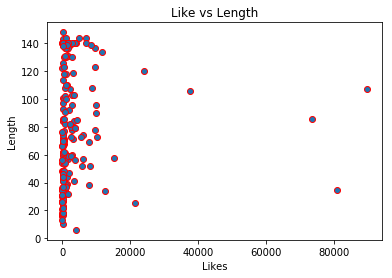

In [79]:
year = data['RTs']
sea_levels = data['len']
plt.scatter(year, sea_levels, edgecolors='r')
plt.xlabel('Likes')
plt.ylabel('Length')
plt.title('Like vs Length')
plt.show()

In [80]:
mean = np.mean(data['len'])
print("the length's average in tweets: {}".format(mean))

the length's average in tweets: 80.67


In [81]:
# We extract the tweet with more FAVs and mote RTs:
 
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])
 
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]
 
# Max FAVs:
print("the tweet with more likes is: \n{}".format(data['tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} character.\n".format(data['len'][fav]))
 
# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} character.\n".format(data['len'][rt]))

the tweet with more likes is: 
Best way to silence the haters (and yeah I mean racists) 🙉😘 #2019 #getsomeeducation https://t.co/ohhkOJtdey
Number of likes: 405748
107 character.

The tweet with more retweets is: 
Best way to silence the haters (and yeah I mean racists) 🙉😘 #2019 #getsomeeducation https://t.co/ohhkOJtdey
Number of retweets: 89598
107 character.



In [82]:
tlen = pd.Series(data = data['len'].values)   #, index=data['Data'])
tfav = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tret = pd.Series(data = data['RTs'].values) #, index=data['Data']

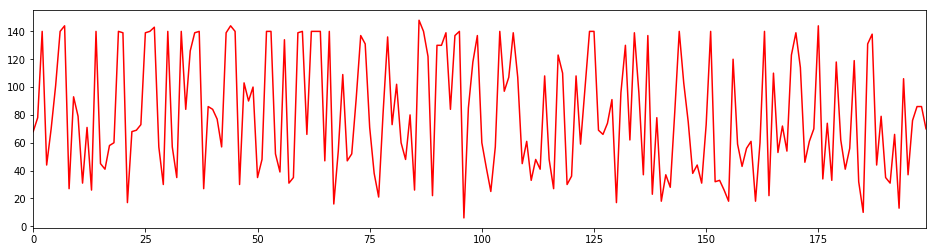

In [83]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

Text(0.5, 1.0, 'Perbandingan Likes dan RT Akun Raheem Sterling')

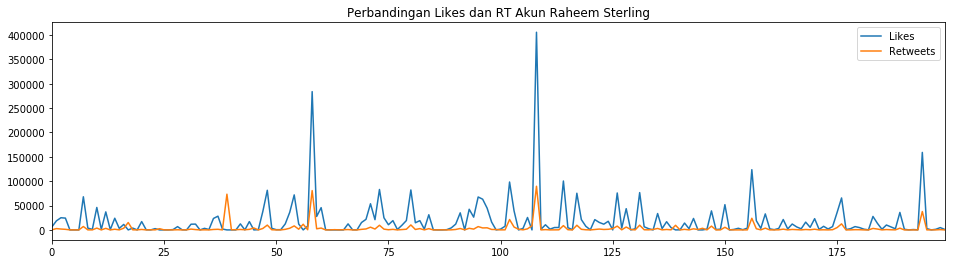

In [91]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);
plt.title('Perbandingan Likes dan RT Akun Raheem Sterling')

In [85]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web App
* Twitter Web Client
* TweetDeck


Text(0.5, 1.0, 'Sumber tweet Raheem Sterling')

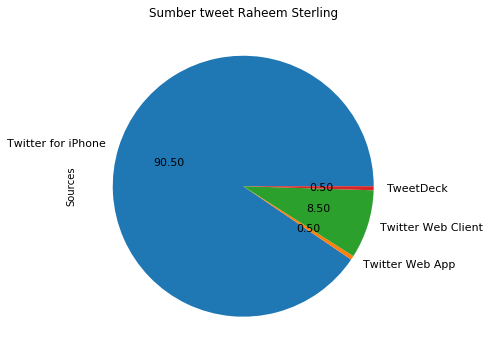

In [94]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100
 
# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));
plt.title('Sumber tweet Raheem Sterling')

In [59]:
from textblob import TextBlob
import re
 
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analys = TextBlob(clean_tweet(tweet))
    
    if analys.sentiment.polarity > 0:
        return 1
    elif analys.sentiment.polarity == 0:
        return 0
    else:
        return -1
    

In [87]:
import numpy  as np
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure
import bokeh
import pandas as pd
from datetime import datetime as dt

In [88]:
def autoconvert_datetime(value):
    formats = ['%m/%d/%Y', '%m-%d-%y']  # formats to try
    result_format = '%d-%m-%Y'  # output format
    for dt_format in formats:
        try:
            dt_obj = datetime.strptime(value, dt_format)
            return dt_obj.strftime(result_format)
        except Exception as e:  # throws exception when format doesn't match
            pass
    return value  # let it be if it doesn't match

data['datetime'] = data['datetime'].apply(autoconvert_datetime)

In [89]:
data['datetime'] = pd.to_datetime(data['datetime'], unit='s')

In [92]:
# Convert date column in df from strings to the proper datetime format
date_format="%Y-%m-%d"
data["datetime"] = pd.to_datetime(data['datetime'], format=date_format)
# Use the same conversion for selected dates
output_file("Panjang.html")
weekapple = data[(data.datetime>=dt.strptime("2019-07-29", date_format)) & 
               (data.datetime<=dt.strptime("2019-08-18", date_format))]

p = figure(x_axis_type="datetime", title="Time Series Jumlah Kata dalam Tweet Raheem Sterling", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'
p.line(weekapple.datetime, weekapple.len)
show(p)



In [ ]:
source = ColumnDataSource(df)

l = figure(title="Historic Inflation Metrics", logo=None)

glyph_1 = l.line('Date','RPI',source=source, legend='RPI', color='red')
l.line('Date','CPI',source=source, legend='CPI', color='blue')
l.line('Date','CPIH',source=source, legend='CPIH', color='gold')

hover = HoverTool(renderers=[glyph_1],
                 tooltips=[     ("Date","@Date{%F}"),
                                ("RPI","@RPI"),
                                ("CPI","@CPI"),
                                ("CPIH","@CPIH")],
                          formatters={"Date": "datetime"},
                      mode='vline'
                 )

show(l)

In [44]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [56]:
data.dtypes

tweets              object
len                  int32
ID                   int64
datetime    datetime64[ns]
Source              object
Likes                int32
RTs                  int32
dtype: object

In [94]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, Legend, LegendItem, Scatter
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models.tools import HoverTool
from bokeh.core.properties import value
from bokeh.palettes import Spectral10, Category20, Category20_17, inferno, magma, viridis
import matplotlib.pyplot as plt
from bokeh.transform import jitter

In [99]:
ax = data.groupby('datetime').size().reset_index()
ax.columns = ['datetime', 'len']

In [100]:
TOOLS = "pan, wheel_zoom, box_zoom, box_select,reset, save" # the tools you want to add to your graph
source = ColumnDataSource(ax) # data for the graph

In [101]:
# Graph has date on the x-axis
p = figure(title="Graph 1: Number of flights per day in 2008", x_axis_type='datetime',tools = TOOLS)

p.line(x='datetime', y='len', source=source) #build a line chart
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Number of flights'

p.xgrid.grid_line_color = None

# add a hover tool and show the date in date time format
hover = HoverTool()
hover.tooltips=[
    ('datetime', '@datetime{%F}'),
    ('len', '@len')
]
hover.formatters = {'datetime': 'datetime'}
p.add_tools(hover)
output_notebook() # show the output in jupyter notebook
show(p)

Loading BokehJS ...